In [1]:
from d2l import torch as d2l
import torch
from torch import nn
import matplotlib.pylab as plt

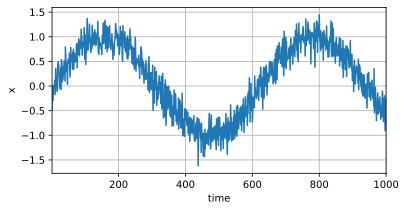

In [34]:
#创建序列
T =1000
time= torch.arange(1,T+1,dtype = torch.float32)
X = torch.sin(0.01 * time) + torch.normal(0,0.2,(T,))
d2l.plot(time,[X],xlabel='time',ylabel='x',xlim=[1,1000],figsize=(6,3))

In [37]:
#x,y自回归，x,y都是同一组序列数据，只不过x是历史数据，y是将来数据
tau = 4
features = torch.zeros((T-tau,tau))
display(features[:2])
for i in range(tau):
    features[:,i] = X[i:T-tau + i]
display(features[:2])
#创建lables
labels = X[tau:].reshape((-1,1))
print('labels[:2]:',labels[:2])
batch_size,n_train = 16, 600
train_iter = d2l.load_array((features[:n_train],labels[:n_train]),batch_size,is_train=True)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])

tensor([[-0.4906,  0.0037, -0.0471, -0.2923],
        [ 0.0037, -0.0471, -0.2923, -0.0188]])

labels[:2]: tensor([[-0.0188],
        [-0.0060]])


In [38]:
for x,y in train_iter:
    print(x,y)
    print(x.shape,y.shape)
    break

tensor([[-0.8562, -0.1505, -0.5402, -1.0090],
        [ 0.9953,  0.7581,  1.2312,  0.8167],
        [ 0.8659,  0.8506,  0.8082,  0.7451],
        [ 0.7561,  0.4372,  0.8834,  0.6794],
        [-0.4232, -0.0071, -0.4633, -0.3054],
        [ 0.9516,  1.0491,  1.2567,  0.9573],
        [ 0.4838,  0.5169,  0.5521,  0.4244],
        [ 0.3442,  0.5679,  0.7894,  0.9897],
        [ 0.9963,  0.7407,  0.8228,  0.7307],
        [ 0.0517, -0.4970, -0.1852, -0.3037],
        [-0.6640, -0.6389, -0.9822, -0.9283],
        [ 0.7700,  1.0997,  0.7496,  0.6949],
        [ 1.0491,  1.2567,  0.9573,  0.8903],
        [ 0.8677,  1.0139,  0.6264,  0.8941],
        [ 0.5514,  0.9428,  0.6205,  0.8712],
        [-0.9283, -0.8765, -1.3133, -0.8472]]) tensor([[-0.9869],
        [ 1.0927],
        [ 0.7920],
        [ 0.9008],
        [-0.3652],
        [ 0.8903],
        [ 0.6218],
        [ 0.6898],
        [ 0.4640],
        [-0.7262],
        [-0.8765],
        [ 0.8180],
        [ 0.7921],
        [ 0.8401

In [39]:
#初始化网络权重的函数
def init_weight(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
        
#创建模型 
#创建一个简单的多层神经网络（感知机）
def get_net():
    net = nn.Sequential(nn.Linear(4,10),
                       nn.ReLU(),
                       nn.Linear(10,1))
    net.apply(init_weight)
    return net
#定义损失
# mse均方误差
loss = nn.MSELoss()

In [40]:
def train(net,train_iter,loss,epochs,lr):
    trainer = torch.optim.Adam(net.parameters(),lr)
    for epoch in range(epochs):
        for x,y in train_iter:
            #梯度归零
            trainer.zero_grad()
            l = loss(net(x),y)
            l.backward()
            trainer.step()
        print(f'epoch:{epoch + 1}',f'loss:{d2l.evaluate_loss(net,train_iter,loss):f}')

In [41]:
net = get_net()
train(net,train_iter,loss,epochs=100,lr=0.01)

epoch:1 loss:0.060515
epoch:2 loss:0.058747
epoch:3 loss:0.053954
epoch:4 loss:0.055623
epoch:5 loss:0.056773
epoch:6 loss:0.052315
epoch:7 loss:0.053228
epoch:8 loss:0.059323
epoch:9 loss:0.051874
epoch:10 loss:0.050860
epoch:11 loss:0.051426
epoch:12 loss:0.050428
epoch:13 loss:0.050748
epoch:14 loss:0.050862
epoch:15 loss:0.051773
epoch:16 loss:0.051133
epoch:17 loss:0.049570
epoch:18 loss:0.051699
epoch:19 loss:0.049109
epoch:20 loss:0.050687
epoch:21 loss:0.049608
epoch:22 loss:0.051455
epoch:23 loss:0.056167
epoch:24 loss:0.052321
epoch:25 loss:0.050852
epoch:26 loss:0.051001
epoch:27 loss:0.051057
epoch:28 loss:0.049320
epoch:29 loss:0.051272
epoch:30 loss:0.052078
epoch:31 loss:0.050604
epoch:32 loss:0.049737
epoch:33 loss:0.049792
epoch:34 loss:0.059105
epoch:35 loss:0.049548
epoch:36 loss:0.050591
epoch:37 loss:0.050200
epoch:38 loss:0.049764
epoch:39 loss:0.054249
epoch:40 loss:0.050507
epoch:41 loss:0.049969
epoch:42 loss:0.051471
epoch:43 loss:0.049698
epoch:44 loss:0.0497

In [42]:
print([time.shape,time[tau:].shape])
print([X.detach().numpy().shape,onestep_preds.detach().numpy().shape])

[torch.Size([1000]), torch.Size([996])]
[(1000,), (996, 1)]


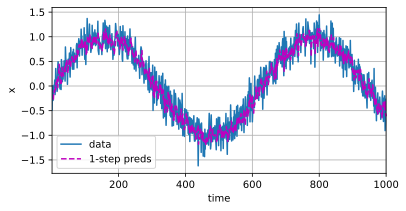

In [43]:
#预测
onestep_preds = net(features)

d2l.plot([time,time[tau:]],[X.detach().numpy(),onestep_preds.detach().numpy()],
        'time','x',legend=['data','1-step preds'],xlim=[1,1000],figsize=(6,3))

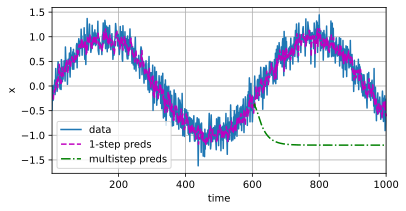

In [45]:
#多步预测
multistep_preds = torch.zeros(T)
#原始数据
multistep_preds[:n_train + tau] = X[:n_train + tau]
for i in range(n_train + tau,T):
    multistep_preds[i] = net(multistep_preds[i - tau:i].reshape((1,-1)))

#画图
d2l.plot([time,time[tau:],time[n_train + tau:]],[X.detach().numpy(),
                                                 onestep_preds.detach().numpy(),
                                                multistep_preds[n_train + tau:].detach().numpy()],
        'time','x',legend=['data','1-step preds','multistep preds'],xlim=[1,1000],figsize=(6,3))


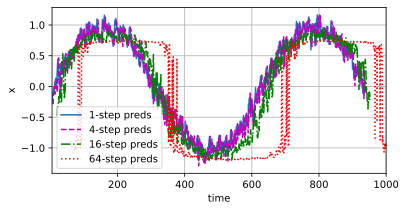

In [49]:
#观察k步预测的结果
max_steps = 64
features = torch.zeros((T - tau - max_steps + 1,tau + max_steps))
# 给前面tau列复制
for i in range(tau):
    features[:,i] = X[i:i + T - tau - max_steps + 1]
#再给后面tau到tau + max_steps列赋值
for i in range(tau,tau + max_steps):
    features[:,i] = net(features[:,i - tau:i]).reshape(-1)

#k步
steps = (1,4,16,64)
d2l.plot([time[tau + i -1:T - max_steps + i] for i in steps],
        [features[:,(tau + i -1)].detach().numpy() for i in steps],
        'time','x',
         legend=[f'{i}-step preds' for i in steps],xlim=[5,1000],figsize=(6,3))